<a href="https://colab.research.google.com/github/sarit-adh/colab_notebooks/blob/main/CS501_HWII_Q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import sys
import time
import matplotlib.pyplot as plt
import networkx as nx
import copy

In [ ]:
np.random.seed(10)

In [ ]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def generate_graph(size):
  graph_dict ={str(i) : [] for i in range(size)}
  for i in range(size):
    for j in range(i+1, size):
      if np.random.random()<0.3:
        graph_dict[str(i)].append(str(j))
        graph_dict[str(j)].append(str(i))
  return graph_dict

In [ ]:
np.random.randint(5)

1

In [ ]:
def extract_edges_from_graph(graph_dict):
  edges_list = []
  for key in graph_dict:
    for elem in graph_dict[key]:
        edges_list.append((key, elem))
  return edges_list


In [ ]:
def randomized_min_cut(graph_dict,edges_size_vec=None):
  
  while len(graph_dict.keys())>2:


    # In each iteration we extract the edges from the adjacency list representation of the graph
    edges_list = extract_edges_from_graph(graph_dict)

    if edges_size_vec is not None : edges_size_vec.append(len(edges_list)//2)


    if len(edges_list)==0 : return 0

    #print(graph_dict)
    #print(edges_list)
    # picking an edge at random
    u, v = edges_list[np.random.randint(len(edges_list))]
    #print(u, v)

    #Extracting the neighbors of the vertices belonging to randomly picked edge
    u_neigh = graph_dict[u]
    v_neigh = graph_dict[v]

    
    
    # Defining the new node and new neighbors after collapsing two nodes connected by picked edge into one
    new_node = u+"_"+v
    new_neighbors = [elem for elem in u_neigh if elem!=u and elem!=v] + [elem for elem in v_neigh if elem!=u and elem!=v]
    # Only elements other than nodes comprising the new node are selected

    #print(new_neighbors)

    #Updating the adjacency list for the nodes connected to nodes connected by picked edge
    for nne in new_neighbors:
      for ue in graph_dict[nne]:
        if ue==u :
          graph_dict[nne].remove(u)
          graph_dict[nne].append(new_node)
        if ue==v:
          graph_dict[nne].remove(v)
          graph_dict[nne].append(new_node)

    #Updating the graph with new node replacing nodes connected by picked edge
    graph_dict.pop(u)
    graph_dict.pop(v)
    graph_dict[new_node] = new_neighbors
    
  edges_list = extract_edges_from_graph(graph_dict)
  return len(edges_list)//2      

    

    






{'0': ['4'], '1': ['2', '3'], '2': ['1', '3'], '3': ['1', '2', '4'], '4': ['0', '3']}
[('0', '4'), ('1', '2'), ('1', '3'), ('2', '1'), ('2', '3'), ('3', '1'), ('3', '2'), ('3', '4'), ('4', '0'), ('4', '3')]
MinCut: 1
{'3_2_1': ['0_4'], '0_4': ['3_2_1']}


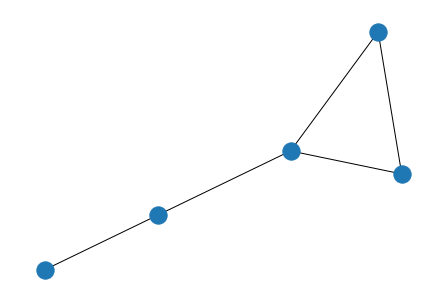

In [ ]:
graph_dict = {'0' : ['4'], '1' : ['2', '3'], '2': ['1', '3'], '3' : ['1', '2', '4'], '4' : ['0', '3'] }
edges_list = extract_edges_from_graph(graph_dict)
edges_list_gt = [('0','4'), ('3','4'), ('1', '2'), ('2' , '3'), ('1', '3')]
print(graph_dict)
print(edges_list)

G = nx.Graph(graph_dict)
nx.draw(G)


print("MinCut:" , randomized_min_cut(graph_dict))
print(graph_dict)

{'0': ['3', '6'], '1': ['3'], '2': ['5', '7', '8'], '3': ['0', '1', '5'], '4': ['5', '6'], '5': ['2', '3', '4', '7', '8'], '6': ['0', '4', '8', '9'], '7': ['2', '5'], '8': ['2', '5', '6'], '9': ['6']}
[('0', '3'), ('0', '6'), ('1', '3'), ('2', '5'), ('2', '7'), ('2', '8'), ('3', '0'), ('3', '1'), ('3', '5'), ('4', '5'), ('4', '6'), ('5', '2'), ('5', '3'), ('5', '4'), ('5', '7'), ('5', '8'), ('6', '0'), ('6', '4'), ('6', '8'), ('6', '9'), ('7', '2'), ('7', '5'), ('8', '2'), ('8', '5'), ('8', '6'), ('9', '6')]
MinCut: 1
{'1': ['9_6_4_7_3_0_2_5_8'], '9_6_4_7_3_0_2_5_8': ['1']}


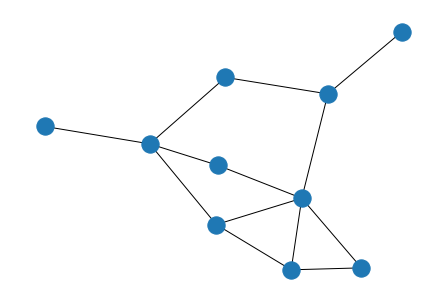

In [ ]:
graph_dict = generate_graph(10)
edges_list = extract_edges_from_graph(graph_dict)
print(graph_dict)
print(edges_list)

G = nx.Graph(graph_dict)
nx.draw(G)


print("MinCut:" , randomized_min_cut(graph_dict))
print(graph_dict)

In [ ]:
graph_sizes = [200, 600, 1000]
time_taken_vec = []
edges_evolution_dict = {}

for graph_size in graph_sizes:
  graph_dict = generate_graph(graph_size)
  start_time = time.time()
  edges_size_vec =[]
  print("MinCut:" , randomized_min_cut(graph_dict, edges_size_vec))
  edges_evolution_dict[graph_size] = edges_size_vec
  time_taken = time.time() - start_time
  time_taken_vec.append(time_taken)




MinCut: 47
MinCut: 176
MinCut: 281


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':


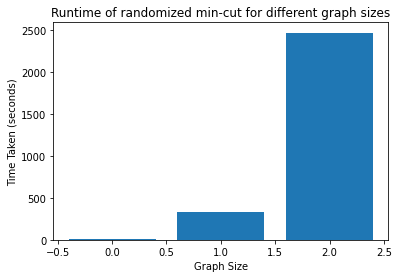

In [ ]:
time_taken_vec = [5.889320135116577, 334.1834237575531, 2470.6611335277557]
ind = np.arange(len(graph_sizes))

fig, ax = plt.subplots()
ax.bar(x=ind, height=time_taken_vec)
ax.set_xlabel('Graph Size')
ax.set_ylabel('Time Taken (seconds)')
ax.set_title('Runtime of randomized min-cut for different graph sizes')
ax.set_xticks(ind, graph_sizes)
plt.show()


In [ ]:
plt.yscale("log")
for size, edges_size_list in edges_evolution_dict.items():
  plt.plot(list(range(len(edges_size_list))), edges_size_list, label=size)
  plt.legend()

NameError: ignored

In [ ]:
def randomized_min_cut_old(graph_dict, edges_list):
  graph_dict_c = copy.deepcopy(graph_dict)
  edges_list_c = copy.deepcopy(edges_list)
  # for key in list(graph_dict_c.keys()):
  #   if len(graph_dict_c[key])==0:
  #     graph_dict_c.pop(key)
  while len(graph_dict_c.keys())>2 and edges_list_c:
    print(graph_dict_c)
    print(edges_list_c)
    rand_edge_ind = np.random.randint(len(edges_list_c))
    u, v = edges_list_c[rand_edge_ind] 
    print("edge picked:", u, v)
    #print("removing edge: ", u, "->" ,v )
    while v in graph_dict_c[u]:
      graph_dict_c[u].remove(v)
    #print("removing edge: ", v, "->" ,u)
    while u in graph_dict_c[v]:
      graph_dict_c[v].remove(u)
    
    #print(edges_list_c, (u,v))

    new_node = u+"_"+v
    for nu in graph_dict_c[u]:
      if (u,nu) in edges_list_c:
        edges_list_c.remove((u,nu))
      if (nu,u) in edges_list_c:
        edges_list_c.remove((nu,u))
      if nu in graph_dict_c and u in graph_dict_c[nu]:
        graph_dict_c[nu].remove(u)
      if nu in graph_dict_c:
        graph_dict_c[nu].append(new_node)

    for nv in graph_dict_c[v]:
      if (v,nv) in edges_list_c:
        edges_list_c.remove((v,nv))
      if (nv,v) in edges_list_c:
        edges_list_c.remove((nv,v))
      if nv in graph_dict_c and v in graph_dict_c[nv]:
        graph_dict_c[nv].remove(v)
      if nv in graph_dict_c:
        graph_dict_c[nv].append(new_node)
    
    
    edges_list_c.remove((u,v))


    new_node = u+"_"+v
    new_neighbors = graph_dict_c[u][:] + graph_dict_c[v][:]
    #print("creating node ", new_node, new_neighbors)

    for new_neighbor in new_neighbors:
      if new_node==new_neighbor:
        new_neighbors.remove(new_neighbor)

    for new_neighbor in new_neighbors:
      edges_list_c.append((new_node, new_neighbor))
    
    graph_dict_c[new_node] = new_neighbors
  
    
    graph_dict_c.pop(u)
    graph_dict_c.pop(v)
    
  return graph_dict_c, edges_list_c
    
    



In [ ]:
graph_dict, edges_list = generate_graph(5)
G = nx.Graph(graph_dict)
nx.draw(G)
graph_dict_c, edges_list_c = randomized_min_cut(graph_dict, edges_list)
print("\n")
print(graph_dict_c)
print(edges_list_c)
print("Min-Cut:", len(edges_list_c))

NameError: ignored